In [21]:
import numpy as np
import pandas as pd
from gtda.mapper import (
    CubicalCover,
    OneDimensionalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph,
    MapperInteractivePlotter
)
from gtda.mapper.cluster import ParallelClustering
from gtda.mapper import Eccentricity,Entropy

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN, KMeans,MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, OPTICS

In [22]:
import matplotlib.pyplot as plt

In [23]:
import openpyxl
xlsx = pd.ExcelFile('41591_2020_897_MOESM3_ESM.xlsx')
df = pd.read_excel(xlsx, '(D) Figure 2A-D')

In [24]:
df = df.rename({'Patient ID': 'ID','IgG S/CO': 'IgG (S/CO)', 'IgM S/CO': 'IgM (S/CO)'}, axis=1)

In [25]:
df1 = df.sort_values('ID')
df1

,ID,Days after symptoms onset,IgG (S/CO),IgM (S/CO),Group
0,1,4,36.272,0.162,IgG seroconverted earlier than IgM
1,1,7,196.891,0.642,IgG seroconverted earlier than IgM
2,1,10,252.084,0.928,IgG seroconverted earlier than IgM
3,1,13,246.375,1.033,IgG seroconverted earlier than IgM
4,2,4,4.072,0.738,IgG seroconverted earlier than IgM
...,...,...,...,...,...
90,27,28,7.599,6.578,IgM seroconverted earlier than IgG
86,27,7,0.327,1.673,IgM seroconverted earlier than IgG
87,27,10,0.727,8.818,IgM seroconverted earlier than IgG
88,27,22,6.490,6.645,IgM seroconverted earlier than IgG


Create tables of each patient.

In [26]:
for x in range(28):
    exec(f'patient_{x} = df1[df1["ID"]==x]')

In [27]:
patient_5

,ID,Days after symptoms onset,IgG (S/CO),IgM (S/CO),Group
100,5,4,0.221,0.231,Synchronous seroconversion
101,5,7,1.258,1.584,Synchronous seroconversion


In [28]:
patients = []
for x in range(28):
    exec(f'patients.append(patient_{x})')

In [29]:
patients[25]

,ID,Days after symptoms onset,IgG (S/CO),IgM (S/CO),Group
51,25,17,0.867,0.368,IgG seroconverted earlier than IgM
50,25,14,0.956,0.385,IgG seroconverted earlier than IgM
49,25,11,0.786,0.339,IgG seroconverted earlier than IgM
48,25,8,0.510,0.326,IgG seroconverted earlier than IgM
47,25,5,0.800,0.349,IgG seroconverted earlier than IgM
46,25,2,0.645,0.362,IgG seroconverted earlier than IgM
53,25,23,1.802,0.605,IgG seroconverted earlier than IgM
54,25,26,1.446,0.451,IgG seroconverted earlier than IgM
52,25,20,1.822,0.579,IgG seroconverted earlier than IgM


In [30]:
def pca_ind(ID):   
    Days = patients[ID]['Days after symptoms onset'].to_numpy()
    data = patients[ID].drop(['ID','Group','Days after symptoms onset'],axis=1)
    data_wd = patients[ID].drop(['ID','Group'],axis=1)
    
    return data,data_wd,Days

# SEVERAL

## Patient 2 with days.

In [31]:
data, data_wd,Days= pca_ind(2)

In [32]:
data_wd

,Days after symptoms onset,IgG (S/CO),IgM (S/CO)
4,4,4.072,0.738
5,7,66.458,6.059
6,10,104.050,7.457
7,13,95.682,7.215
8,16,82.838,6.848
9,19,75.330,6.566
10,22,78.927,9.206
11,25,65.975,8.068


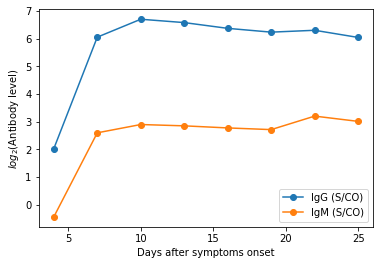

In [37]:
plt.plot(Days, np.log2(data['IgG (S/CO)']),'o-')
plt.plot(Days, np.log2(data['IgM (S/CO)']),'o-')
plt.xlabel("Days after symptoms onset")
plt.ylabel("$log_2$(Antibody level)")
plt.legend(["IgG (S/CO)", "IgM (S/CO)"] )
plt.show()

In [40]:
#filter_func =PCA(n_components=1)

filter_func =PCA(n_components=2)
cover = CubicalCover(n_intervals=100, overlap_frac=0.9705,kind='balanced') 
clusterer = DBSCAN(eps = 0.1,metric='cosine')

n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    #contract_nodes=True,
    verbose=False,
    n_jobs=n_jobs,
)

fig = plot_static_mapper_graph(pipe, data_wd, 
                                        layout_dim=2, 
                                        node_scale=20,
                                        color_data = data_wd[['Days after symptoms onset']],
                                        plotly_params = {"layout" : {"font_size":14}}
                                       )
fig
#fig.write_image("images/SP_2_2.pdf")

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': '#888', 'width': 1},
       …

## Patient 3 with days.

In [41]:
data, data_wd,Days = pca_ind(3)

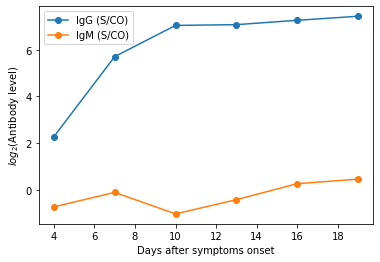

In [43]:
data_wd = data_wd.sort_values(by="Days after symptoms onset")
Days = np.sort(Days)

plt.plot(Days, np.log2(data_wd['IgG (S/CO)']),'o-')
plt.plot(Days, np.log2(data_wd['IgM (S/CO)']),'o-')
plt.xlabel("Days after symptoms onset")
plt.ylabel("$log_2$(Antibody level)")
plt.legend(["IgG (S/CO)", "IgM (S/CO)"] )
plt.show()

In [47]:
#filter_func =PCA(n_components=1)
filter_func =PCA(n_components=2)
cover = CubicalCover(n_intervals=100, overlap_frac=0.98,kind='balanced') 
clusterer = DBSCAN(eps = 0.1,metric='cosine')

#500, 0.994
#48,0.95
#50, 0.95
#50,0.97

n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    #contract_nodes=True,
    verbose=False,
    n_jobs=n_jobs,
)

fig = plot_static_mapper_graph(pipe, data_wd, 
                                        layout_dim=2, 
                                        node_scale=20,
                                        color_data = data_wd[['Days after symptoms onset']],
                                        plotly_params = {"layout" : {"font_size":14}}
                                       )
fig
#fig.write_image("images/SP_3_2.pdf")

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': '#888', 'width': 1},
       …

## Patient 12 with days.

In [48]:
data, data_wd,Days = pca_ind(12)
data_wd

,Days after symptoms onset,IgG (S/CO),IgM (S/CO)
108,21,8.806,34.152
105,12,4.472,6.350
104,9,0.767,0.562
107,18,8.302,27.552
106,15,8.257,18.932


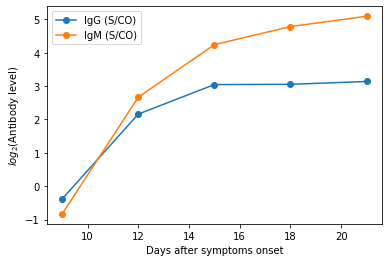

In [49]:
data_wd = data_wd.sort_values(by="Days after symptoms onset")
Days = np.sort(Days)

plt.plot(Days, np.log2(data_wd['IgG (S/CO)']),'o-')
plt.plot(Days, np.log2(data_wd['IgM (S/CO)']),'o-')
plt.xlabel("Days after symptoms onset")
plt.ylabel("$log_2$(Antibody level)")
plt.legend(["IgG (S/CO)", "IgM (S/CO)"] )
plt.show()

In [52]:
filter_func =PCA(n_components=2)
cover = CubicalCover(n_intervals=100, overlap_frac=0.9852,kind='balanced') 

#500, 0.998

clusterer = DBSCAN(eps = 0.1,metric='cosine')

n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    #contract_nodes=True,
    verbose=False,
    n_jobs=n_jobs,
)

fig = plot_static_mapper_graph(pipe, data_wd, 
                                        layout_dim=2, 
                                        node_scale=20,
                                        color_data = data_wd[['Days after symptoms onset']],
                                        plotly_params = {"layout" : {"font_size":14}}
                                       )
fig
#fig.write_image("images/SP_12_2.pdf")

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': '#888', 'width': 1},
       …

## Patient 15 with days.

In [53]:
data, data_wd,Days = pca_ind(15)
data_wd

,Days after symptoms onset,IgG (S/CO),IgM (S/CO)
60,10,0.700,2.794
61,13,2.771,4.924
62,16,6.831,7.445
63,19,7.599,6.623
64,22,11.935,5.848


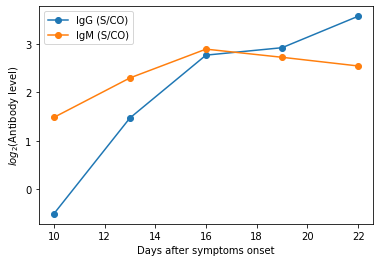

In [54]:
data_wd = data_wd.sort_values(by="Days after symptoms onset")
Days = np.sort(Days)

plt.plot(Days, np.log2(data_wd['IgG (S/CO)']),'o-')
plt.plot(Days, np.log2(data_wd['IgM (S/CO)']),'o-')
plt.xlabel("Days after symptoms onset")
plt.ylabel("$log_2$(Antibody level)")
plt.legend(["IgG (S/CO)", "IgM (S/CO)"] )
plt.show()

In [55]:
filter_func =PCA(n_components=2)
cover = CubicalCover(n_intervals=100, overlap_frac=0.9852, kind= 'balanced') 

clusterer = DBSCAN(eps = 0.1,metric='cosine')

n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    #contract_nodes=True,
    verbose=False,
    n_jobs=n_jobs,
)

fig = plot_static_mapper_graph(pipe, data_wd, 
                                        layout_dim=2, 
                                        node_scale=20,
                                        color_data = data_wd[['Days after symptoms onset']],
                                        plotly_params = {"layout" : {"font_size":14}}
                                       )
fig
#fig.write_image("images/SP_15_2.pdf")

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': '#888', 'width': 1},
       …

## Patient 20 with days.

In [56]:
data, data_wd,Days = pca_ind(20)

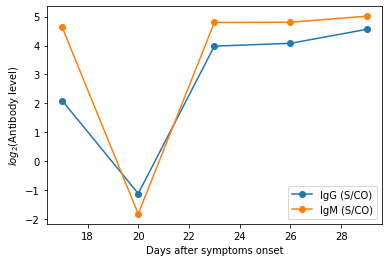

In [57]:
data_wd = data_wd.sort_values(by="Days after symptoms onset")
Days = np.sort(Days)

plt.plot(Days, np.log2(data_wd['IgG (S/CO)']),'o-')
plt.plot(Days, np.log2(data_wd['IgM (S/CO)']),'o-')
plt.xlabel("Days after symptoms onset")
plt.ylabel("$log_2$(Antibody level)")
plt.legend(["IgG (S/CO)", "IgM (S/CO)"] )
plt.show()

In [58]:
filter_func =PCA(n_components=2)
cover = CubicalCover(n_intervals=100, overlap_frac=0.98, kind='balanced') 

clusterer = DBSCAN(eps = 0.1,metric='cosine')

n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    #contract_nodes=True,
    verbose=False,
    n_jobs=n_jobs,
)

fig = plot_static_mapper_graph(pipe, data_wd, 
                                        layout_dim=2, 
                                        node_scale=20,
                                        color_data = data_wd[['Days after symptoms onset']],
                                        plotly_params = {"layout" : {"font_size":14}}
                                       )
fig
#fig.write_image("images/SP_20_2.pdf")

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': '#888', 'width': 1},
       …

# NON SEVERAL

## Patient 4 with days.

In [59]:
data, data_wd,Days = pca_ind(4)

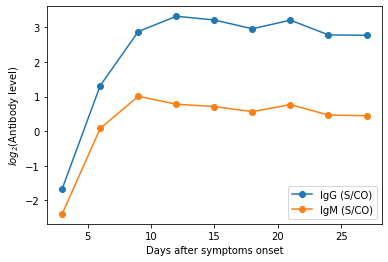

In [60]:
data_wd = data_wd.sort_values(by="Days after symptoms onset")
Days = np.sort(Days)

plt.plot(Days, np.log2(data_wd['IgG (S/CO)']),'o-')
plt.plot(Days, np.log2(data_wd['IgM (S/CO)']),'o-')
plt.xlabel("Days after symptoms onset")
plt.ylabel("$log_2$(Antibody level)")
plt.legend(["IgG (S/CO)", "IgM (S/CO)"] )
plt.show()

In [61]:
filter_func =PCA(n_components=2)
cover = CubicalCover(n_intervals=100, overlap_frac=0.98, kind='balanced') 

#0.9801


clusterer = DBSCAN(eps = 0.1,metric='cosine')

n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    #contract_nodes=True,
    verbose=False,
    n_jobs=n_jobs,
)

fig = plot_static_mapper_graph(pipe, data_wd, 
                                        layout_dim=2, 
                                        node_scale=20,
                                        color_data = data_wd[['Days after symptoms onset']],
                                        plotly_params = {"layout" : {"font_size":14}}
                                       )
fig
fig.write_image("images/NSP_4_2.pdf")

## Patient 13 with days.

In [62]:
data, data_wd,Days = pca_ind(13)

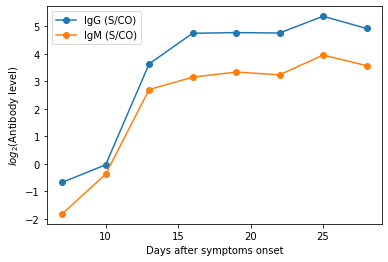

In [63]:
data_wd = data_wd.sort_values(by="Days after symptoms onset")
Days = np.sort(Days)

plt.plot(Days, np.log2(data_wd['IgG (S/CO)']),'o-')
plt.plot(Days, np.log2(data_wd['IgM (S/CO)']),'o-')
plt.xlabel("Days after symptoms onset")
plt.ylabel("$log_2$(Antibody level)")
plt.legend(["IgG (S/CO)", "IgM (S/CO)"] )
plt.show()

In [64]:
filter_func =PCA(n_components=2)
cover = CubicalCover(n_intervals=100, overlap_frac=0.982, kind='balanced') 

#50, 0.95,0.94

clusterer = DBSCAN(eps = 0.1,metric='cosine')

n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    #contract_nodes=True,
    verbose=False,
    n_jobs=n_jobs,
)

fig = plot_static_mapper_graph(pipe, data_wd, 
                                        layout_dim=2, 
                                        node_scale=20,
                                        color_data = data_wd[['Days after symptoms onset']],
                                        plotly_params = {"layout" : {"font_size":14}}
                                       )
fig
#fig.write_image("images/NSP_13_2.pdf")

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': '#888', 'width': 1},
       …

## Patient 14 with days.

In [65]:
data, data_wd,Days = pca_ind(14)

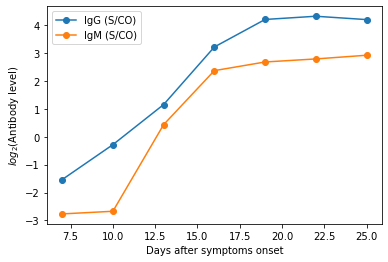

In [66]:
data_wd = data_wd.sort_values(by="Days after symptoms onset")
Days = np.sort(Days)

plt.plot(Days, np.log2(data_wd['IgG (S/CO)']),'o-')
plt.plot(Days, np.log2(data_wd['IgM (S/CO)']),'o-')
plt.xlabel("Days after symptoms onset")
plt.ylabel("$log_2$(Antibody level)")
plt.legend(["IgG (S/CO)", "IgM (S/CO)"] )
plt.show()

In [67]:
filter_func =PCA(n_components=2)
cover = CubicalCover(n_intervals=100, overlap_frac=0.98, kind = 'balanced') 
#500, 0.997
#500, 0.9967
#50, 0.966

clusterer = DBSCAN(eps = 0.1,metric='cosine')

n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    #contract_nodes=True,
    verbose=False,
    n_jobs=n_jobs,
)

fig = plot_static_mapper_graph(pipe, data_wd, 
                                        layout_dim=2, 
                                        node_scale=20,
                                        color_data = data_wd[['Days after symptoms onset']],
                                        plotly_params = {"layout" : {"font_size":14}}
                                       )
fig
#fig.write_image("images/NSP_14_2.pdf")

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': '#888', 'width': 1},
       …

## Patient 21 with days.********

In [68]:
data, data_wd,Days = pca_ind(21)

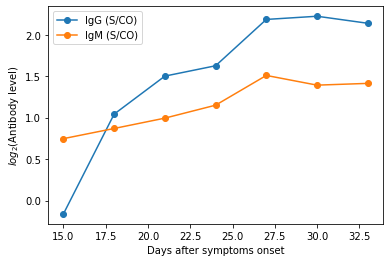

In [69]:
data_wd = data_wd.sort_values(by="Days after symptoms onset")
Days = np.sort(Days)

plt.plot(Days, np.log2(data_wd['IgG (S/CO)']),'o-')
plt.plot(Days, np.log2(data_wd['IgM (S/CO)']),'o-')
plt.xlabel("Days after symptoms onset")
plt.ylabel("$log_2$(Antibody level)")
plt.legend(["IgG (S/CO)", "IgM (S/CO)"] )
plt.show()

In [70]:
filter_func =PCA(n_components=2)
cover = CubicalCover(n_intervals=100, overlap_frac=0.97, kind = 'balanced'
                    ) 

#500,0.994
#500,0.987

#50, 0.94

clusterer = DBSCAN(eps = 0.1,metric='cosine')

n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    #contract_nodes=True,
    verbose=False,
    n_jobs=n_jobs,
)

fig = plot_static_mapper_graph(pipe, data_wd, 
                                        layout_dim=2, 
                                        node_scale=20,
                                        color_data = data_wd[['Days after symptoms onset']],
                                        plotly_params = {"layout" : {"font_size":14}}
                                       )
fig
#fig.write_image("images/NSP_21_2.pdf")

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': '#888', 'width': 1},
       …

## Patient 25 with days.

In [71]:
data, data_wd,Days = pca_ind(25)

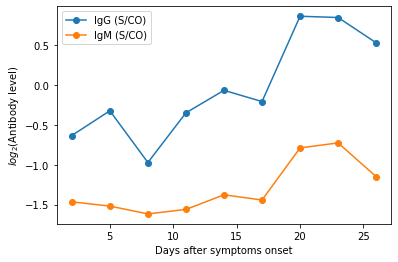

In [72]:
data_wd = data_wd.sort_values(by="Days after symptoms onset")
Days = np.sort(Days)

plt.plot(Days, np.log2(data_wd['IgG (S/CO)']),'o-')
plt.plot(Days, np.log2(data_wd['IgM (S/CO)']),'o-')
plt.xlabel("Days after symptoms onset")
plt.ylabel("$log_2$(Antibody level)")
plt.legend(["IgG (S/CO)", "IgM (S/CO)"] )
plt.show()

In [73]:
filter_func =PCA(n_components=2)
cover = CubicalCover(n_intervals=100, overlap_frac=0.98, kind= 'balanced') 

#############500,0.98, 0.989,0.993, 0.94

clusterer = DBSCAN(eps = 0.1,metric='cosine')

n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    #contract_nodes=True,
    verbose=False,
    n_jobs=n_jobs,
)

fig = plot_static_mapper_graph(pipe, data_wd, 
                                        layout_dim=2, 
                                        node_scale=20,
                                        color_data = data_wd[['Days after symptoms onset']],
                                        plotly_params = {"layout" : {"font_size":14}}
                                       )
fig
#fig.write_image("images/NSP_25_2.pdf")

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': '#888', 'width': 1},
       …

In [74]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

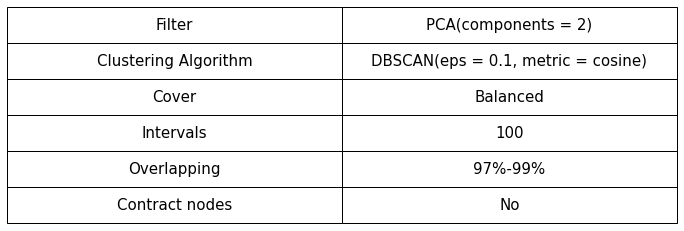

In [75]:
meta_table = plt.table(cellText=[['Filter', 'PCA(components = 2)'], 
     ['Clustering Algorithm', 'DBSCAN(eps = 0.1, metric = cosine)'],
     ['Cover', 'Balanced'],
     ['Intervals', '100'],
     ['Overlapping', '97%-99%'],
     ['Contract nodes', 'No']],
         cellLoc = 'center',
         loc = 'center',
         colLoc = 'center',
         rowLoc = 'center',
         #cellColours = [['#E0CBBD','w'],['#E0CBBD','w'],['#E0CBBD','w'],['#E0CBBD','w'],['#E0CBBD','w'],['#E0CBBD','w']],
         edges = 'closed',
         #colWidths = [0.05,0.20,0.10,0.10,0.10]
         )
plt.axis('off')
meta_table.auto_set_font_size(False)
meta_table.set_fontsize(15)
meta_table.scale(2,3)
meta_fig = meta_table.figure

pp = PdfPages("tabind1.pdf")
pp.savefig(meta_fig, bbox_inches='tight')
pp.close()